In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('ggplot')


# Import data

In [309]:
import scipy.io
data = scipy.io.loadmat('ML7209_Data.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jul 10 09:14:43 2020',
 '__version__': '1.0',
 '__globals__': [],
 'name_l': array(['RM_031313_0pt_to_5pt'], dtype='<U20'),
 'DataMatrix': array([[0, 2, 3, ..., 0, 1, 1],
        [1, 0, 2, ..., 0, 0, 1],
        [1, 0, 4, ..., 0, 1, 1],
        ...,
        [6, 7, 3, ..., 1, 0, 4],
        [0, 0, 0, ..., 0, 0, 4],
        [0, 1, 2, ..., 0, 0, 4]], dtype=uint8)}

In [310]:
DataMatrix=data["DataMatrix"]
Data=pd.DataFrame(DataMatrix)

dataDropLabel= Data
Data=Data.drop(df.columns[27], axis=1)


KeyError: "['label'] not found in axis"

In [302]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,2,3,1,3,2,0,0,0,0,...,1,0,5,0,0,0,0,0,1,1
1,1,0,2,1,1,3,2,0,0,0,...,1,0,3,0,0,0,0,0,0,1
2,1,0,4,0,5,3,0,0,1,0,...,0,0,8,1,0,0,0,0,1,1
3,0,0,3,0,2,4,1,1,0,0,...,1,0,5,0,0,0,0,0,1,1
4,2,0,2,1,0,3,2,1,0,0,...,0,0,5,0,0,0,0,0,0,1


# PCA without preprocessing

In [311]:
pca=PCA(n_components=27)
pca.fit(Data)
PC=pca.transform(Data)

pca_data=pd.DataFrame(data=PC)
pca_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,...,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,-1.516402e-16,-3.276512e-16,1.462245e-16,3.466062e-16,1.692413e-17,-2.843254e-17,-1.083144e-16,2.085053e-16,-1.299773e-16,-5.280329e-17,...,-2.775558e-17,-2.707861e-17,-9.815996e-18,-1.963199e-17,3.147888e-17,1.895503e-17,6.769653e-18,1.793958e-17,-2.475154e-18,-6.769653e-19
std,3.291353e+00,2.258817e+00,1.963522e+00,1.686667e+00,1.577140e+00,1.459016e+00,1.384058e+00,1.206937e+00,1.070749e+00,9.919508e-01,...,3.286665e-01,2.211669e-01,2.104616e-01,1.739651e-01,1.557490e-01,1.113984e-01,9.293927e-02,8.782147e-02,1.251299e-16,5.365466e-17
min,-5.052542e+00,-4.106973e+00,-5.330484e+00,-2.847176e+00,-3.042984e+00,-3.138740e+00,-2.583719e+00,-2.077593e+00,-2.241328e+00,-2.080385e+00,...,-6.031303e-01,-4.483111e-01,-4.702324e-01,-3.020974e-01,-2.872860e-01,-2.156200e-01,-2.443236e-01,-1.830159e-01,-3.306108e-16,-1.133352e-16
25%,-2.781432e+00,-1.436865e+00,-1.186471e+00,-8.712422e-01,-1.150311e+00,-9.809567e-01,-1.056889e+00,-9.197418e-01,-7.651563e-01,-5.680917e-01,...,-1.995678e-01,-1.545484e-01,-1.232575e-01,-9.274691e-02,-1.049511e-01,-8.205151e-02,-3.874791e-02,-6.126305e-02,-1.060005e-16,-3.700734e-17
50%,-2.675686e-01,6.442184e-02,2.497073e-01,-1.650068e-01,-1.318941e-01,1.703422e-01,-2.089108e-01,-1.077103e-01,-7.702298e-02,3.352099e-02,...,-8.639240e-02,-9.107036e-03,2.840135e-03,-1.121393e-02,5.533597e-03,-1.968974e-03,-1.283232e-03,-7.091127e-03,-1.917078e-18,-9.688328e-18
75%,2.919745e+00,7.477866e-01,1.204550e+00,9.109754e-01,1.126373e+00,6.926582e-01,1.065308e+00,7.004459e-01,7.410554e-01,5.652206e-01,...,1.901226e-01,1.504559e-01,1.225129e-01,7.190751e-02,1.185784e-01,4.916903e-02,3.677236e-02,4.752415e-02,7.878391e-17,3.585105e-17
max,5.711852e+00,8.152257e+00,5.452901e+00,6.241329e+00,3.933648e+00,3.825793e+00,2.589810e+00,2.714044e+00,2.312126e+00,2.553721e+00,...,7.396053e-01,5.262282e-01,8.227933e-01,4.043637e-01,3.027413e-01,3.146002e-01,3.170739e-01,2.301827e-01,2.288375e-16,1.160734e-16


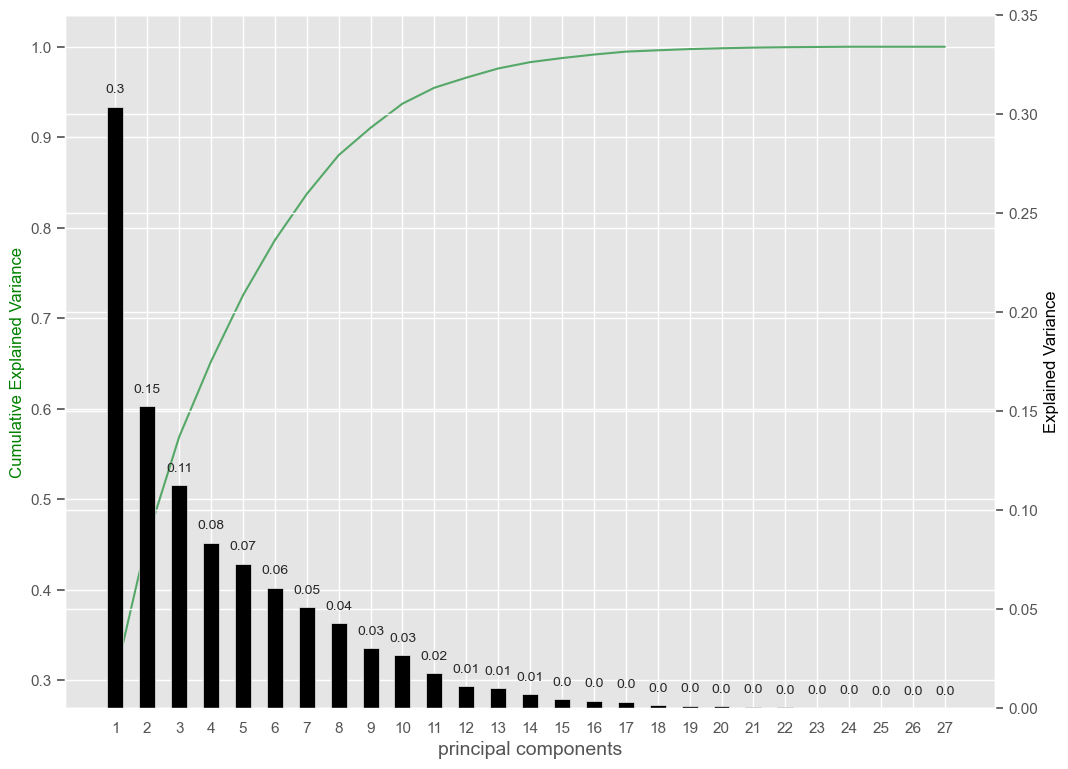

In [260]:


Explained_var_data = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cum_explained_variance = np.cumsum(Explained_var_data)
plt.rcParams['figure.figsize'] = (12.0, 9.0)

fig,ax = plt.subplots()

# make a plot
plt.plot(range(1,28), cum_explained_variance,label='Cumulative Explained Variance',color='g')
# set x-axis label
ax.set_xlabel("principal components", fontsize = 14)
# set y-axis label
ax.set_ylabel("Cumulative Explained Variance",color="green")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(range(1,28), Explained_var_data,label='Explained Variance',color='black',width=0.5)
ax2.set_ylabel("Explained Variance",color="black")
for x,y in zip(np.arange(len(df.columns))+1,pca.explained_variance_ratio_):
    label = round(y, 2)
    ax2.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
    
ax2.set_xticks(np.arange(pca.n_components_)+1)
ax2.set_ylim(0, 0.35)
plt.show()

In [261]:
pca = PCA(n_components=0.9)
reduced_data1 = pca.fit_transform(Data)

# Print new shape of data
print(reduced_data1.shape)

(41, 9)


# Preprocessing

In [262]:
scaler = StandardScaler()
scaler.fit(Data)
df_scaled=scaler.transform(Data)
df_1=pd.DataFrame(data=df_scaled)


In [263]:
pca_1=PCA(n_components=27)
pca_1.fit(df_1)
PC=pca_1.transform(df_1)

pca_data_1=pd.DataFrame(data=PC)
pca_data_1.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.104996,-0.475795,-0.134521,-0.429961,-0.704637,2.137303,-0.004740,-0.717939,-0.638107,0.022205,...,-1.057462,-0.015513,-0.246772,0.438832,0.226139,-0.212406,-0.054858,-4.960961e-17,-1.188904e-16,-4.036460e-17
1,-0.488232,-0.632655,-1.231627,-0.601498,0.320092,-0.246609,1.253599,0.302774,1.089512,0.290874,...,0.527514,0.144500,0.059963,0.288945,0.235886,0.060161,-0.050640,-6.937945e-17,-2.102205e-16,1.019815e-17
2,-1.094902,2.020872,1.560566,-1.165666,-1.650184,2.201212,-2.087657,-1.143088,0.898224,-0.009638,...,0.401379,0.491258,1.019680,0.475439,-0.133108,0.135823,-0.341975,-1.189985e-16,4.778545e-16,4.290213e-17
3,-1.512571,-0.637353,-1.321412,-2.137759,0.917769,1.439291,-1.439403,-0.322310,0.702794,0.691718,...,-0.281642,-0.221287,-0.102360,-0.218725,0.361869,-0.036351,0.447070,-6.348740e-17,2.696877e-16,1.268766e-18
4,-0.506151,-0.240085,-1.393515,-1.641972,0.819842,-0.961061,0.024369,1.034684,1.378961,-0.464060,...,1.131580,-0.600346,0.160989,0.032320,-0.594751,0.086901,-0.105513,6.522655e-16,-9.919815e-17,1.019815e-17


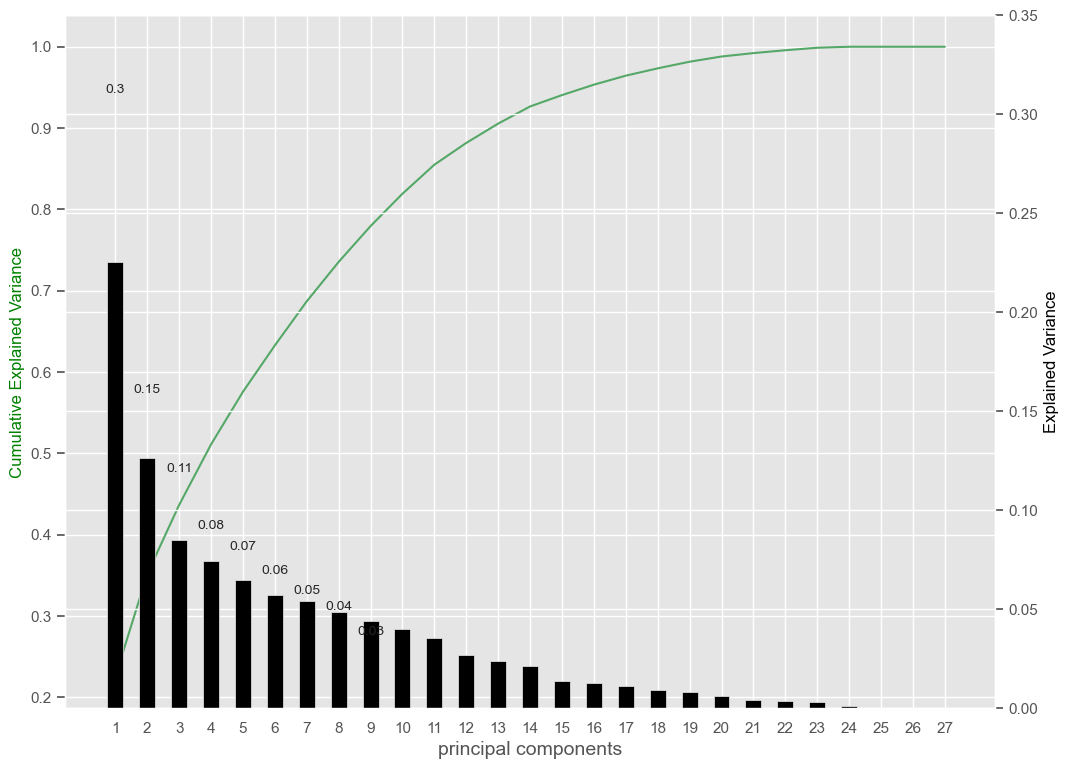

In [264]:

Explained_var_data_1 = pca_1.explained_variance_ratio_

# Calculate the cumulative explained variance
cum_explained_variance_1 = np.cumsum(Explained_var_data_1)
plt.rcParams['figure.figsize'] = (12.0, 9.0)

fig,ax = plt.subplots()

# make a plot
plt.plot(range(1,28), cum_explained_variance_1,label='Cumulative Explained Variance',color='g')
# set x-axis label
ax.set_xlabel("principal components", fontsize = 14)
# set y-axis label
ax.set_ylabel("Cumulative Explained Variance",color="green")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(range(1,28), Explained_var_data_1,label='Explained Variance',color='black',width=0.5)
ax2.set_ylabel("Explained Variance",color="black")
for x,y in zip(np.arange(len(df.columns))+1,pca.explained_variance_ratio_):
    label = round(y, 2)
    ax2.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
    
ax2.set_xticks(np.arange(pca_1.n_components_)+1)
ax2.set_ylim(0, 0.35)
plt.show()





# Comparision between with preprocessing and without preprocessing PCA's

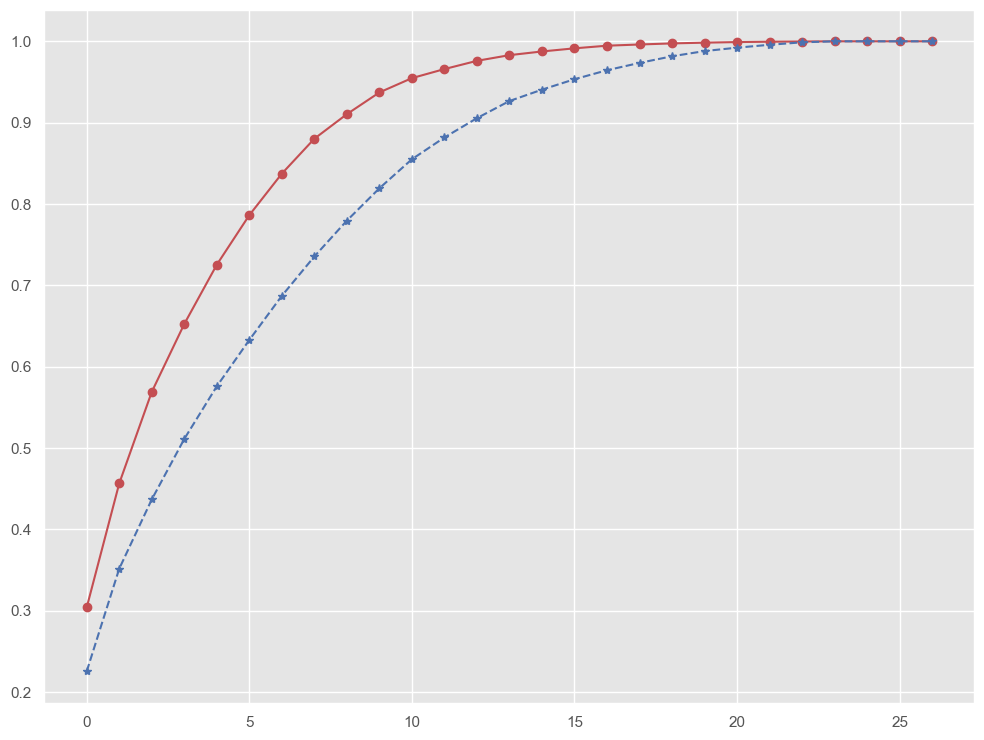

In [265]:


plt.plot(cum_explained_variance, 'r-o', label='raw')
plt.plot(cum_explained_variance_1, 'b--*', label='Preprocessed')

# Outliers

In [279]:
Outlier = Data
# Calculate the z-score for each value in the dataframe
z_scores = (Outlier - Outlier.mean()) / Outlier.std()
# Identify the rows with outliers
outliers = (np.abs(z_scores) > 3).any(axis=1)
# Remove the rows with outliers
df_without_outliers = Data[~outliers]
df_without_outliers.shape

(32, 27)

In [280]:
pca_2=PCA(n_components=27)
pca_2.fit(df_without_outliers)
PC=pca_2.transform(df_without_outliers)

pca_data_2=pd.DataFrame(data=PC)
pca_data_2.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.082646,-1.006102,0.774166,-2.180645,0.538333,1.006057,-1.046535,-0.142301,0.342001,-1.287854,...,0.033257,-0.163072,0.144828,-3.157995e-17,-1.882127e-18,1.206294e-16,0.0,0.0,0.0,0.0
1,-0.733752,1.556490,-0.644309,-0.216087,-0.242339,-1.177353,0.906103,-0.316057,0.989391,-0.146376,...,-0.052878,0.002666,0.061970,-4.176006e-17,1.706047e-17,3.253672e-17,0.0,0.0,0.0,0.0
2,-3.601672,-3.607536,3.720257,-1.489998,-1.492103,2.801736,-0.154510,0.531157,0.892333,0.255212,...,0.028535,0.040316,-0.110120,7.396738e-17,1.032492e-17,-3.890212e-17,0.0,0.0,0.0,0.0
3,-3.532055,1.740737,1.353327,-0.755009,-1.994913,-0.609951,-0.361146,-0.269865,0.828060,0.927748,...,-0.211518,-0.161012,-0.094296,-1.340951e-16,-4.395812e-17,-4.764630e-17,0.0,0.0,0.0,0.0
4,-2.642738,0.639434,0.742484,0.300454,0.177025,-2.164704,1.068898,-1.254517,1.657861,0.251801,...,0.077040,0.028397,0.071666,1.829209e-17,-5.849952e-17,-6.469607e-17,0.0,0.0,0.0,0.0


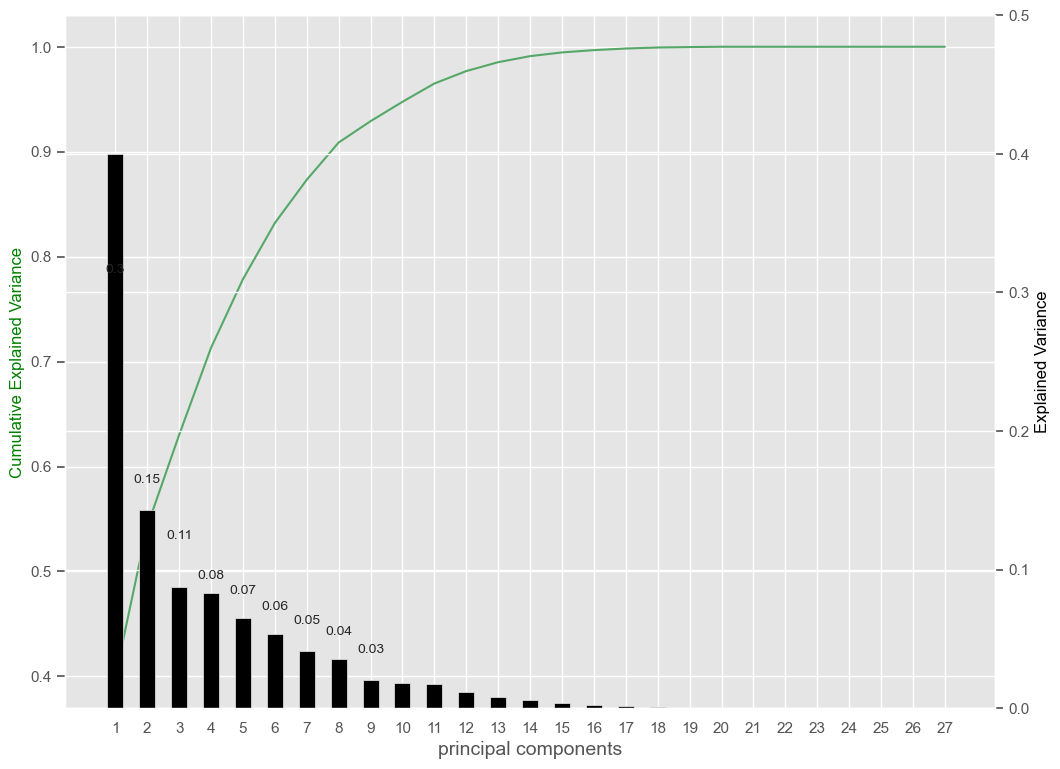

In [281]:
Explained_var_data_2 = pca_2.explained_variance_ratio_

# Calculate the cumulative explained variance
cum_explained_variance_2 = np.cumsum(Explained_var_data_2)
plt.rcParams['figure.figsize'] = (12.0, 9.0)

fig,ax = plt.subplots()

# make a plot
plt.plot(range(1,28), cum_explained_variance_2,label='Cumulative Explained Variance',color='g')
# set x-axis label
ax.set_xlabel("principal components", fontsize = 14)
# set y-axis label
ax.set_ylabel("Cumulative Explained Variance",color="green")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(range(1,28), Explained_var_data_2,label='Explained Variance',color='black',width=0.5)
ax2.set_ylabel("Explained Variance",color="black")
for x,y in zip(np.arange(len(df.columns))+1,pca.explained_variance_ratio_):
    label = round(y, 2)
    ax2.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
    
ax2.set_xticks(np.arange(pca_1.n_components_)+1)
ax2.set_ylim(0, 0.5)
plt.show()

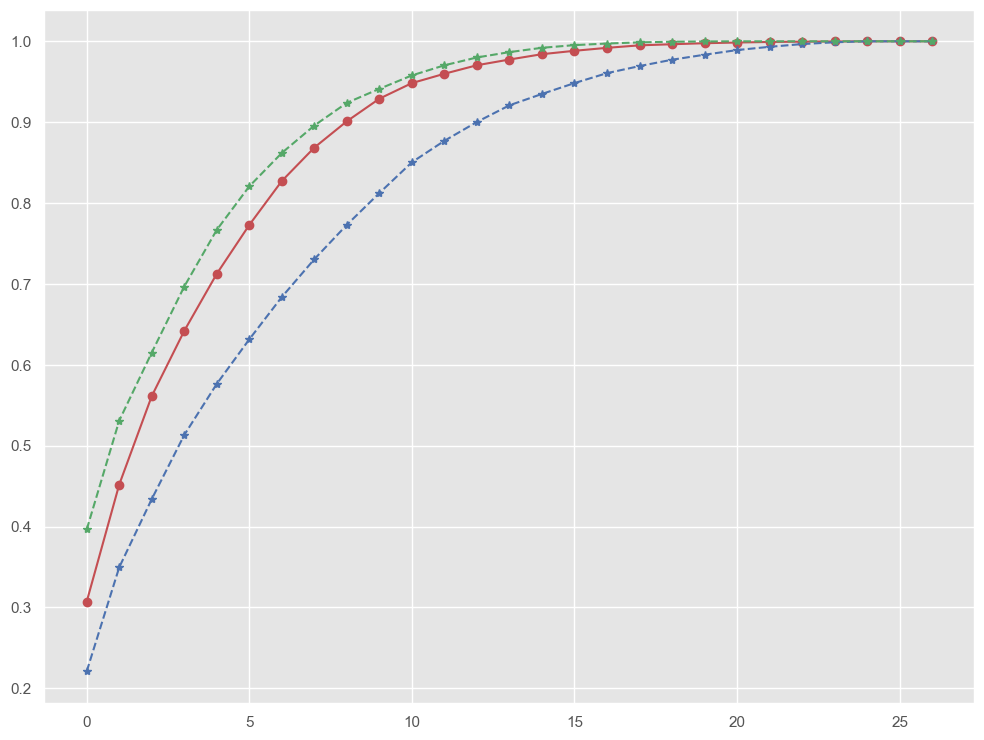

In [247]:
plt.plot(cum_explained_variance, 'r-o', label='raw')
plt.plot(cum_explained_variance_1, 'b--*', label='Preprocessed')
plt.plot(cum_explained_variance_2, 'g--*', label='Preprocessed')

In [284]:
pca_data= pd.DataFrame(pca_data)
pca_data_1=pd.DataFrame(pca_data_1)
pca_data_2=pd.DataFrame(pca_data_2)
pca_data["label"]=dataDropLabel.iloc[:,27]
pca_data_1["label"]=dataDropLabel.iloc[:,27]
pca_data_2["label"]=dataDropLabel.iloc[:,27]

In [286]:
df_new_list = [pca_data, pca_data_1, pca_data_2]

# Use a for loop to iterate over the dataframes
for df in df_list:
    # Change all the elements in the 'label' column from 1 to 2 and 2 to 1
    df['label'].replace({2:1, 4:3}, inplace=True)
    df['label'].replace({3:2}, inplace=True)

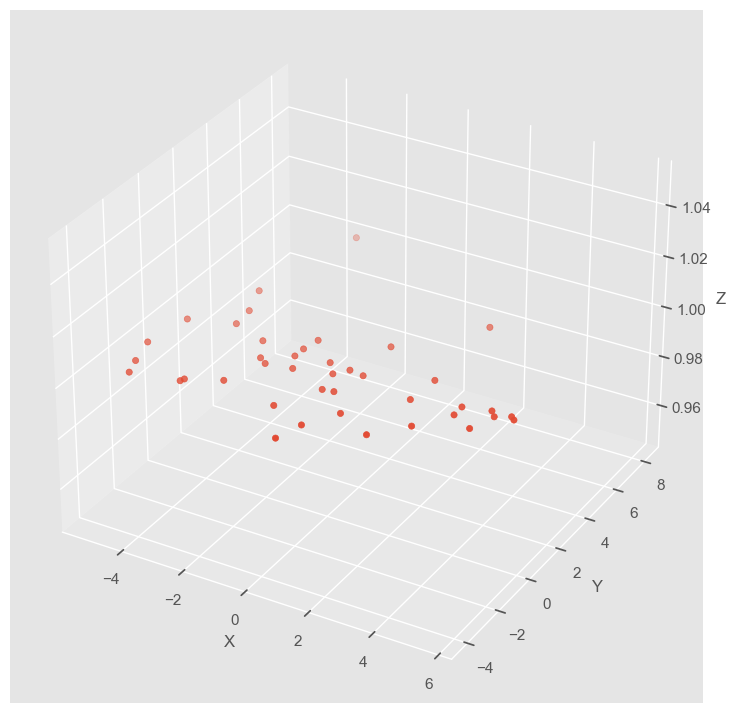

In [288]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1], pca_data['label'])

# Add labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

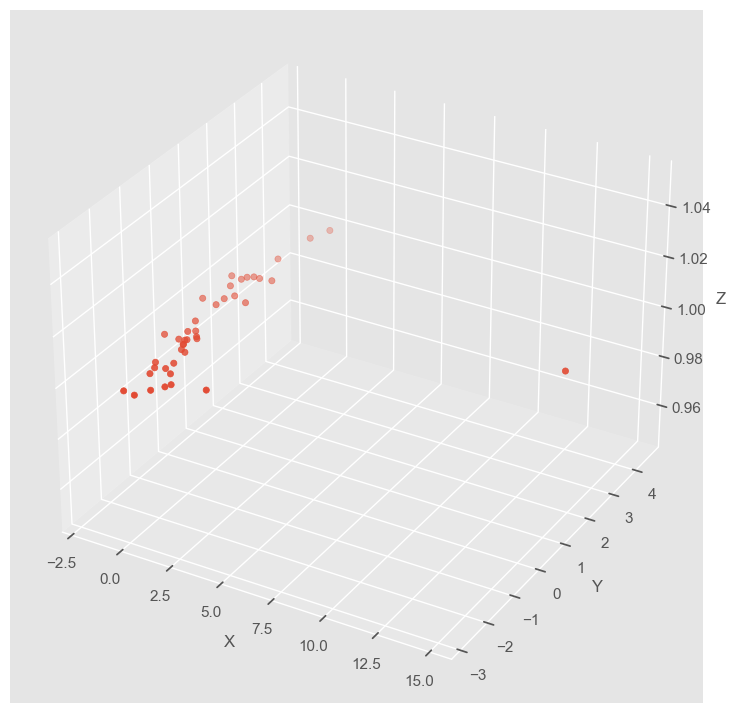

In [289]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data_1.iloc[:,0], pca_data_1.iloc[:,1], pca_data_1['label'])

# Add labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

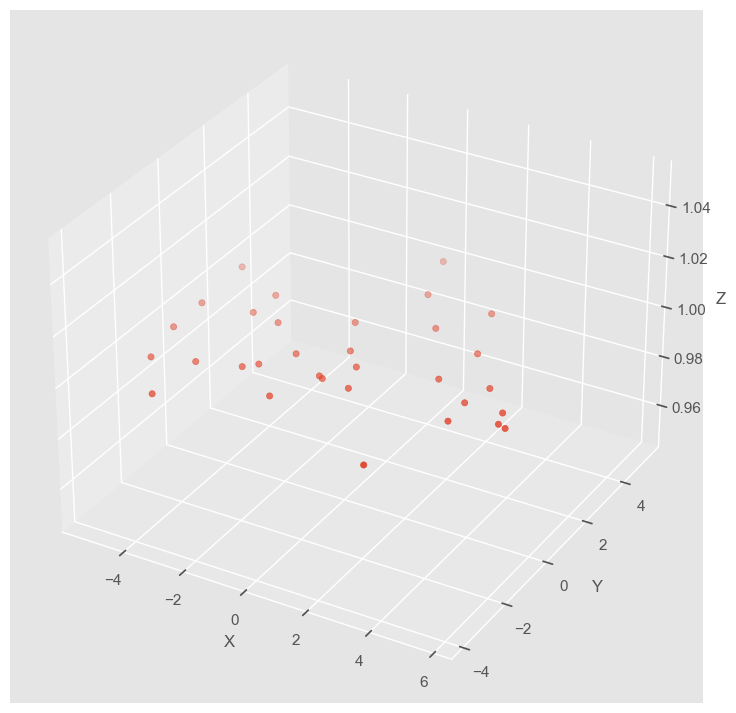

In [290]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data_2.iloc[:,0], pca_data_2.iloc[:,1], pca_data_2['label'])

# Add labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

ValueError: The `markers` argument has the wrong number of values

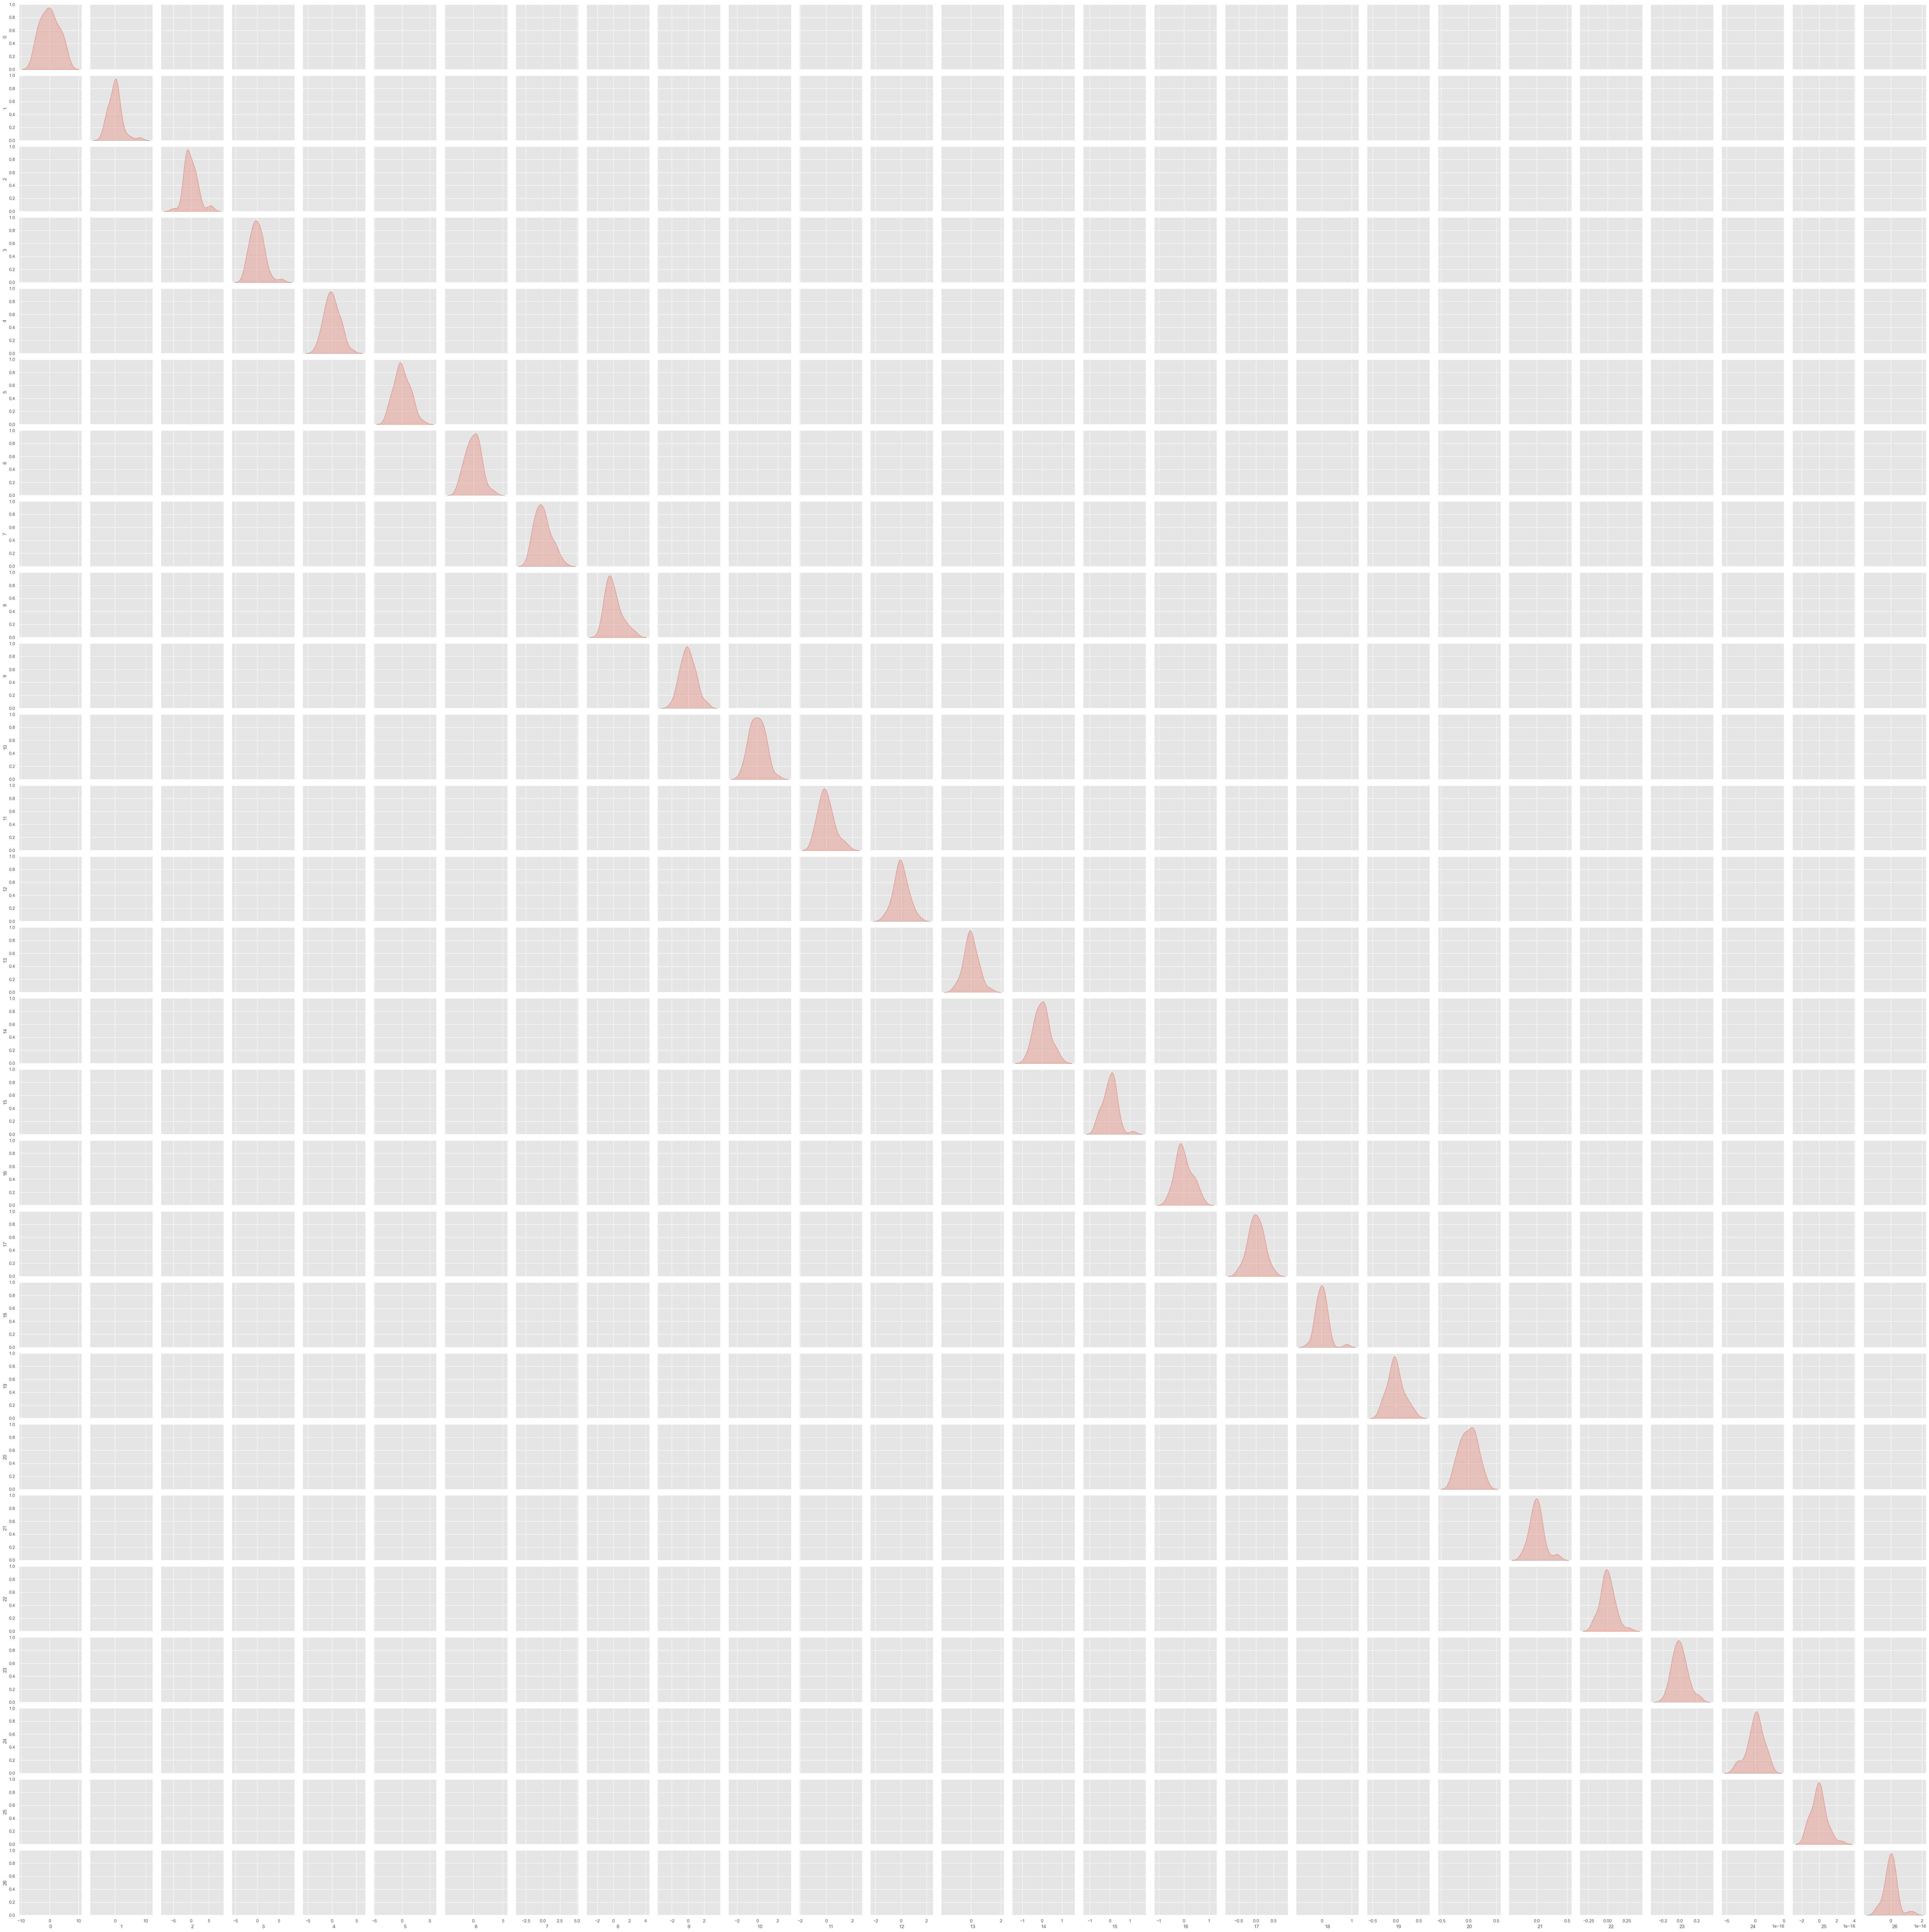

In [308]:
df = pca_data

# Create a scatter plot matrix
sns.pairplot(df, hue='label', markers=['o', 'x'])

# Show the plot
plt.show()